

---


Возьмём холодную часть как Мурнагана (1) и Бёрча-Мурнагана 3-го порядка (2)

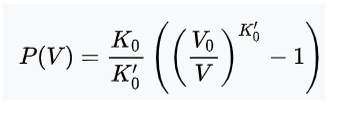
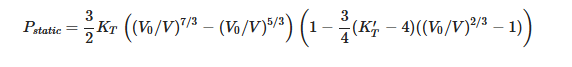

<ipython-input-1-eed4f18f0952>:24: RuntimeWarning: invalid value encountered in divide
  return np.where(x!=0, x**4 * np.exp(x) / (np.exp(x) - 1)**2, 0)


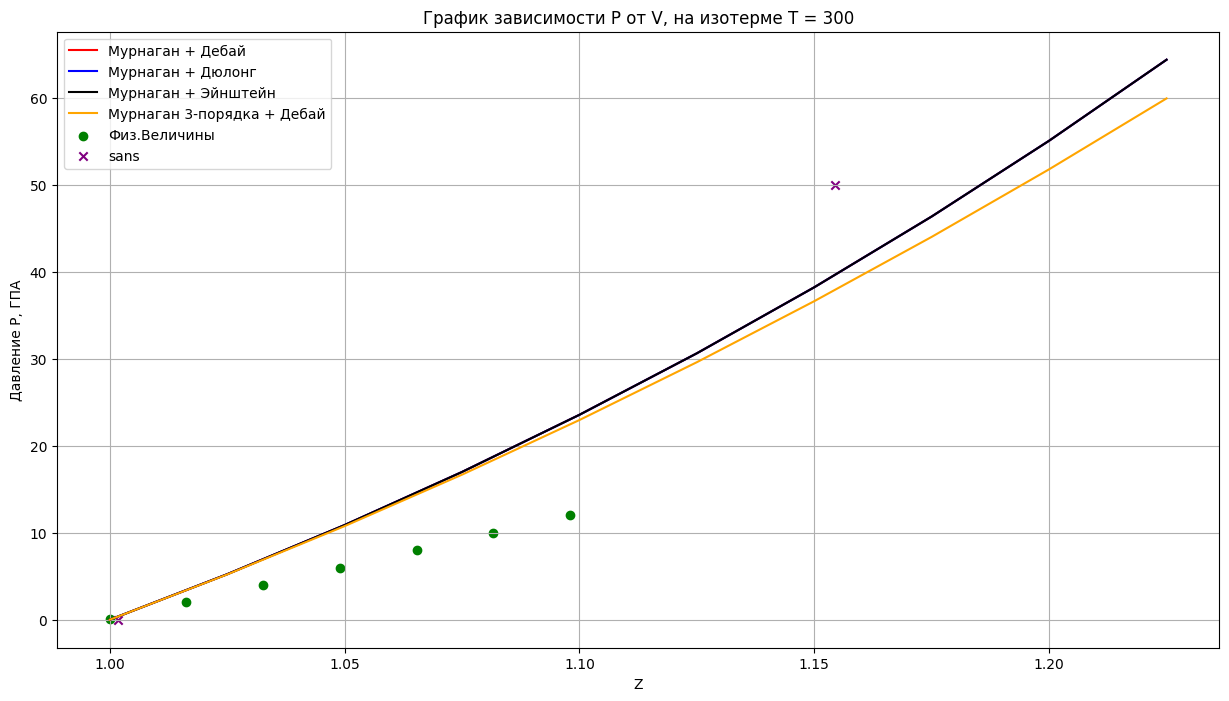

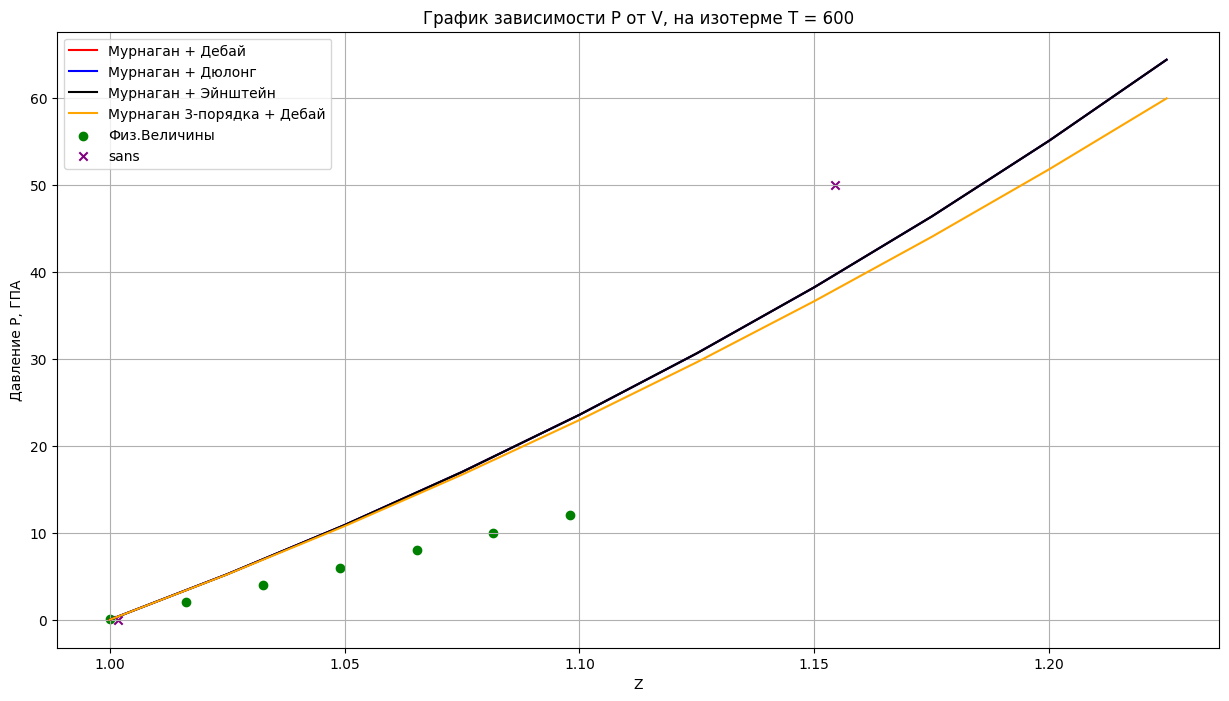

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

K = 201 * 10**9
K_ = 4.2
z = np.arange(1.0, 1.25, 0.025)
V = np.linspace(2.34, 2.808, 10)
teta = 1250
R = 8.31
gamma = 1.67
h_ = 6.625 * 10**(-34) # Дж*c Постоянная планка
kb = 1.38 * 10**(-23) # Дж/K Постоянная Больцмана
omega = 10**(13) # Рад/c ОЦЕНОЧНОЕ ЧИСЛО

class P_value:

    def __init__(self, T):
        self.T = T
        self.Cv = self.calc_Cv()
        self.CvEinst = self.calc_CvEinst()

    def func(self, x):
        return np.where(x!=0, x**4 * np.exp(x) / (np.exp(x) - 1)**2, 0)

    def calc_Cv(self):
        ot = self.T / teta
        d = 1 / ot
        m = 500
        c = 0
        h = (d - c) / (2 * m)
        x = c + h * np.arange(0, 2 * m + 1)
        y = self.func(x)
        integral = h / 3 * (4 * np.sum(y[1::2]) + 2 * np.sum(y[2:2*m-1:2]) + y[0] + y[-1])
        return 9 * R * ot**3 * integral

    def calc_CvEinst(self):
        bez_skobki = h_ * omega / (kb * self.T)
        return (bez_skobki**2) * 3 * R * math.exp(bez_skobki) / ((math.exp(bez_skobki) - 1)**2)

    def P_Debay(self):
        return K / K_ * ((z)**(K_) - 1) + self.Cv * gamma / V

    def P_Dulong(self):
        return K / K_ * ((z)**(K_) - 1) + 3 * R * gamma / V

    def P_Einst(self):
        return K / K_ * ((z)**(K_) - 1) + self.CvEinst * gamma / V

    def P_Murn3(self):
        return 3 / 2 * K * ((z)**(7 / 3) - (z)**(5 / 3)) * (1 - 3 / 4 * (K_ - 4)*((z)**(2 / 3) - 1)) + self.Cv * gamma / V #Мурнаган + Дебай

    def plot(self):
        P_deb = self.P_Debay()
        P_dul = self.P_Dulong()
        P_Ein = self.P_Einst()
        P_Mur = self.P_Murn3()

        plt.figure(figsize=(15, 8))
        plt.plot(z, P_deb/10**9, label='Мурнаган + Дебай', color='red')
        plt.plot(z, P_dul/10**9, label='Мурнаган + Дюлонг', color='blue')
        plt.plot(z, P_Ein/10**9, label='Мурнаган + Эйнштейн', color='black')
        plt.plot(z, P_Mur/10**9, label='Мурнаган 3-порядка + Дебай', color='orange')

        P_phys = [0.05, 2, 4, 6, 8, 10, 12] # Физические Величины
        plt.scatter(np.linspace(1.0, 1.098, len(P_phys)), P_phys, color='green', label='Физ.Величины', marker='o')

        P_sans = [0, 50] #100
        V_sans = [1.001724234, 1.154487179] # sans  1.420907298
        plt.scatter(V_sans, P_sans, color='purple', label='sans', marker='x')
        plt.title(f'График зависимости P от V, на изотерме T = {self.T}')
        plt.xlabel('Z')
        plt.ylabel('Давление P, ГПА')
        plt.legend()
        plt.grid()
        plt.savefig(f'{self.T}.png')

P_300 = P_value(300)
P_300.plot()
P_600 = P_value(600)
P_600.plot()
#Апроксимацию Дебая для смеси

---
#КАЛЛОРИКА


image.png
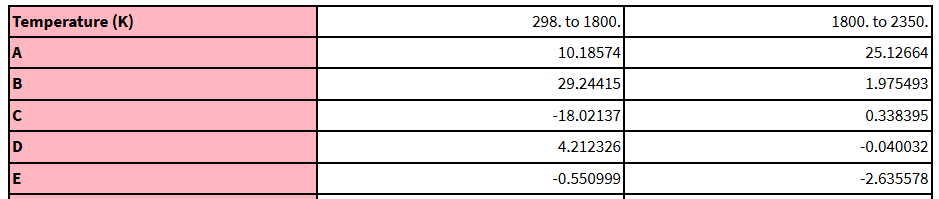

<ipython-input-3-3d21b64c46be>:2: RuntimeWarning: invalid value encountered in divide
  return np.where(x!=0, x**4*np.exp(x)/(np.exp(x)-1)**2, 0)


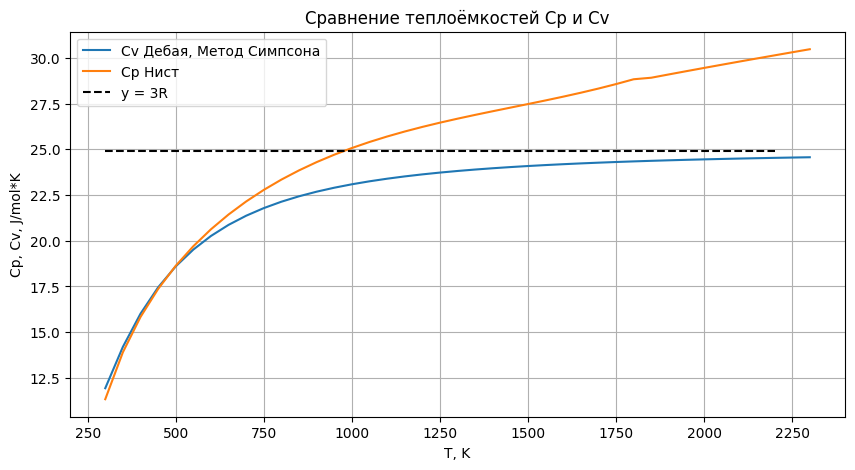

In [3]:
def func(x):
    return np.where(x!=0, x**4*np.exp(x)/(np.exp(x)-1)**2, 0)
Cv_Debay = []
m = 500
c = 0
for t in range(300, 2350, 50):
    z=t/teta
    d=1/z
    h=(d-c)/2/m
    x=c+h*np.arange(0, 2*m+1)
    y=func(x)
    integral=h/3*(4*np.sum(y[1::2])+2*np.sum(y[2:2*m-1:2])+y[0]+y[-1])
    Cv_Debay.append(9*R*z**3*integral)
Cv_Debay = np.array(Cv_Debay)
"-----------------------------------------------------------------------------------------"

Cp_nist = []
for t in range(300, 2350, 50):
    if t <= 1800:
      Cp_nist.append(10.18574 + 29.24415 * (t*0.001) - 18.02137 * (t*0.001)**2 + 4.212326 * (t*0.001)**3 - 0.550999 / (t*0.001)**2)
    if t >= 1801 and t <= 2350:
      Cp_nist.append(25.12664 + 1.975493 * (t*0.001) + 0.338395 * (t*0.001)**2 - 0.040032 *(t*0.001)**3 - 2.635578 / (t*0.001)**2)
Cp_nist = np.array(Cp_nist)

'-------------------------------------------------------------------------------------------------'
assipt = np.arange(300, 2250, 50)
y_asymptote = 24.93 * np.ones_like(assipt)  # горизонтальная асимптота

plt.figure(figsize=(10, 5))
plt.grid(True)
plt.plot(np.arange(300, 2350, 50), Cv_Debay, label='Сv Дебая, Метод Симпсона')
plt.plot(np.arange(300, 2350, 50), Cp_nist, label='Cp Нист')
plt.plot(assipt, y_asymptote, 'k--', label='y = 3R')
plt.legend()
plt.xlabel('T, K')
plt.ylabel('Cp, Cv, J/mol*K')
plt.title('Сравнение теплоёмкостей Cp и Cv')
plt.savefig('CpCv.png')


image.png
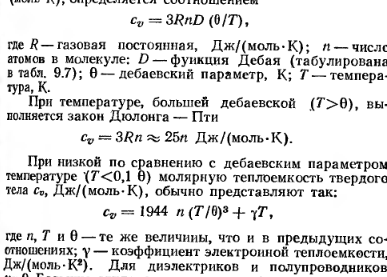
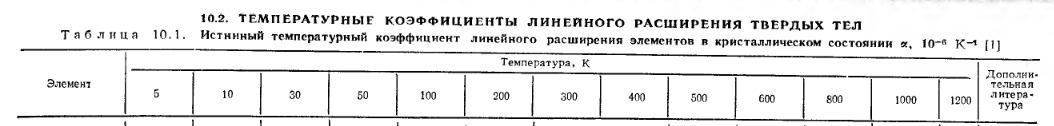
image.png



---


ВСЕ МУРНАГАНЫ 3 ПОРЯДКА

<ipython-input-4-f7bb766e10f7>:24: RuntimeWarning: invalid value encountered in divide
  return np.where(x!=0, x**4 * np.exp(x) / (np.exp(x) - 1)**2, 0)


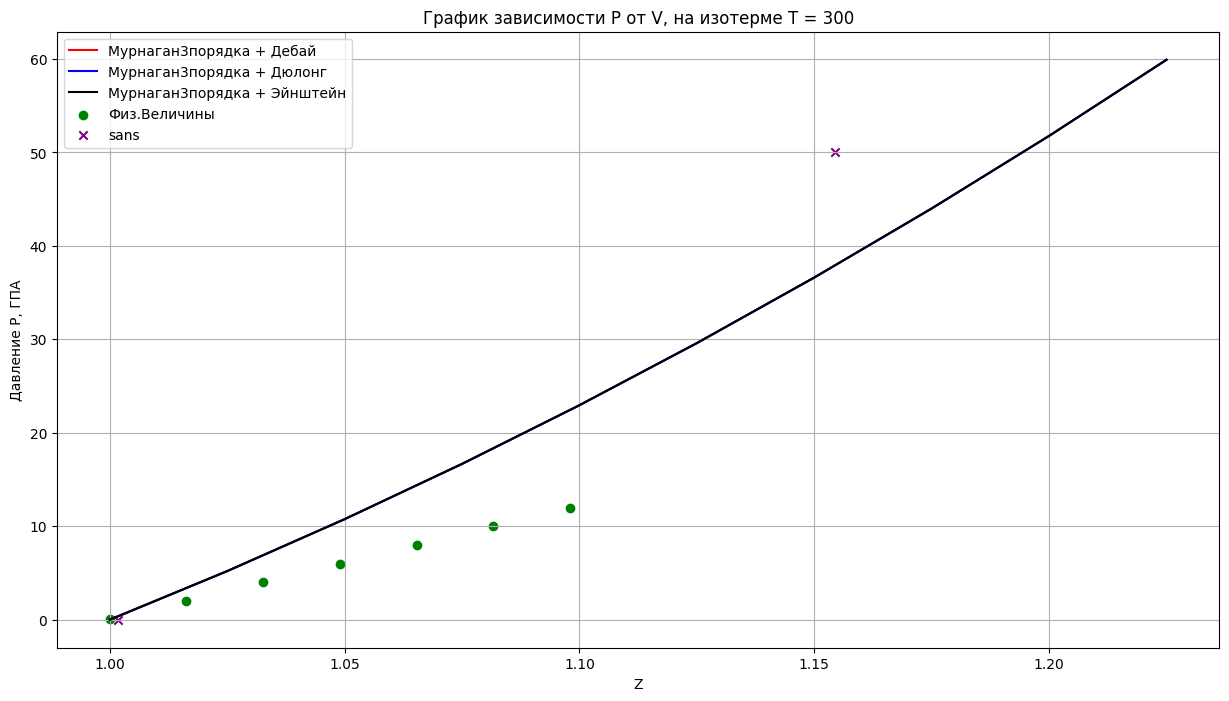

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math

K = 201 * 10**9
K_ = 4.2
z = np.arange(1.0, 1.25, 0.025)
V = np.linspace(2.34, 2.808, 10)
teta = 1250
R = 8.31
gamma = 1.67
h_ = 6.625 * 10**(-34) # Дж*c Постоянная планка
kb = 1.38 * 10**(-23) # Дж/K Постоянная Больцмана
omega = 10**(13) # Рад/c ОЦЕНОЧНОЕ ЧИСЛО

class P_value:

    def __init__(self, T):
        self.T = T
        self.Cv = self.calc_Cv()
        self.CvEinst = self.calc_CvEinst()

    def func(self, x):
        return np.where(x!=0, x**4 * np.exp(x) / (np.exp(x) - 1)**2, 0)

    def calc_Cv(self):
        ot = self.T / teta
        d = 1 / ot
        m = 500
        c = 0
        h = (d - c) / (2 * m)
        x = c + h * np.arange(0, 2 * m + 1)
        y = self.func(x)
        integral = h / 3 * (4 * np.sum(y[1::2]) + 2 * np.sum(y[2:2*m-1:2]) + y[0] + y[-1])
        return 9 * R * ot**3 * integral

    def calc_CvEinst(self):
        bez_skobki = h_ * omega / (kb * self.T)
        return (bez_skobki**2) * 3 * R * math.exp(bez_skobki) / ((math.exp(bez_skobki) - 1)**2)

    def P_Debay(self):
        return 3 / 2 * K * ((z)**(7 / 3) - (z)**(5 / 3)) * (1 - 3 / 4 * (K_ - 4)*((z)**(2 / 3) - 1)) + self.Cv * gamma / V

    def P_Dulong(self):
         return 3 / 2 * K * ((z)**(7 / 3) - (z)**(5 / 3)) * (1 - 3 / 4 * (K_ - 4)*((z)**(2 / 3) - 1)) + 3 * R * gamma / V

    def P_Einst(self):
        return 3 / 2 * K * ((z)**(7 / 3) - (z)**(5 / 3)) * (1 - 3 / 4 * (K_ - 4)*((z)**(2 / 3) - 1)) + self.CvEinst * gamma / V


    def plot(self):
        P_deb = self.P_Debay()
        P_dul = self.P_Dulong()
        P_Ein = self.P_Einst()

        plt.figure(figsize=(15, 8))
        plt.plot(z, P_deb/10**9, label='Мурнаган3порядка + Дебай', color='red')
        plt.plot(z, P_dul/10**9, label='Мурнаган3порядка + Дюлонг', color='blue')
        plt.plot(z, P_Ein/10**9, label='Мурнаган3порядка + Эйнштейн', color='black')

        P_phys = [0.05, 2, 4, 6, 8, 10, 12] # Физические Величины
        plt.scatter(np.linspace(1.0, 1.098, len(P_phys)), P_phys, color='green', label='Физ.Величины', marker='o')

        P_sans = [0, 50] #100
        V_sans = [1.001724234, 1.154487179] # sans  1.420907298
        plt.scatter(V_sans, P_sans, color='purple', label='sans', marker='x')
        plt.title(f'График зависимости P от V, на изотерме T = {self.T}')
        plt.xlabel('Z')
        plt.ylabel('Давление P, ГПА')
        plt.legend()
        plt.grid()
        plt.show()

P_300 = P_value(300)
P_300.plot()


---
АПРОКСИМАЦИЯ ТЕПЛОЁМКОСТИ ЛИНЕЙНОЙ РЕГРЕССИЕЙ И ГРАДЕНТНЫМ СПУСКОМ

---




Оптимальные параметры: A = 202.81476160687328 , B = 117.76391447583863


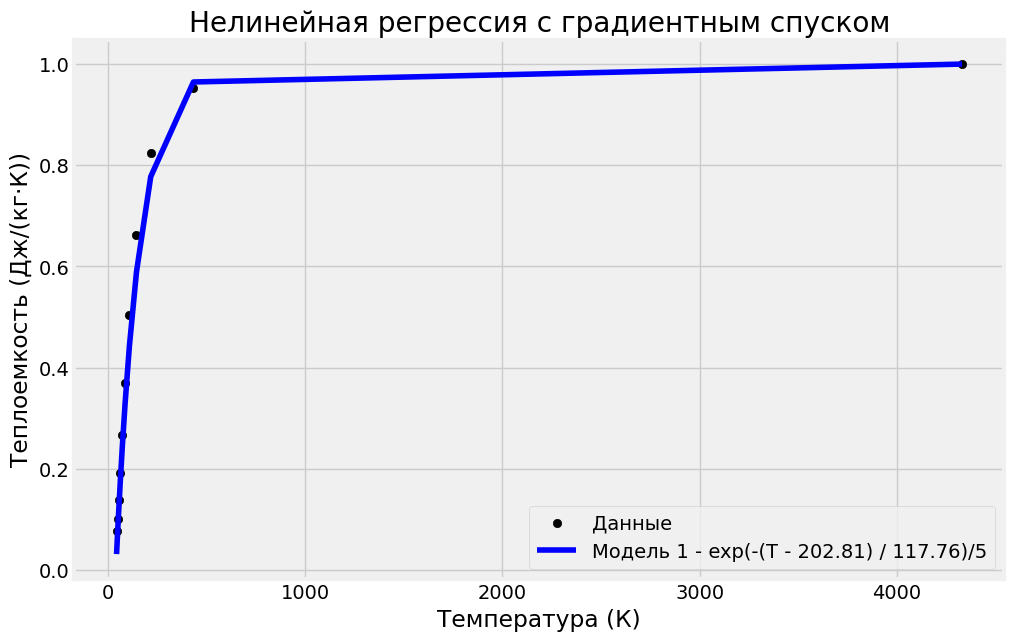

In [5]:
import numpy as np
import matplotlib.pyplot as plt

class GradientDescentLinearRegression:
    def __init__(self, learning_rate=0.5, iterations=60000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.X = np.array([])
        self.Y = np.array([])
        self.A = 0
        self.B = 0

    def plot_data(self):
        plt.figure(figsize=(12,7))
        plt.style.use('fivethirtyeight')
        plt.scatter(self.X, self.Y, color='black', label='Данные')
        plt.plot(self.X, self.predict(), color='blue', label=f'Модель 1 - exp(-(T - {self.A:.2f}) / {self.B:.2f})/5')
        plt.xlabel('Температура (К)')
        plt.ylabel('Теплоемкость (Дж/(кг·К))')
        plt.title('Нелинейная регрессия с градиентным спуском')
        plt.legend()
        plt.savefig('descent.png')

    def save_data(self):
        np.savez('FirstDataSet.npz', array1=self.X, array2=self.Y)

    def generate_data(self):
        self.X = np.array([4330.0, 433.0, 216.5, 144.3, 108.3, 86.6, 72.2, 61.9, 54.1, 48.1, 43.3])       # Температура в К
        self.Y = np.array([1, 0.952, 0.825, 0.663, 0.503, 0.369, 0.266, 0.191, 0.138, 0.101, 0.076])      # Экспериментальная теплоёмкость в Дж/(кг·К)

    def fit(self):
        self.A = 180
        self.B = 90
        n = self.X.shape[0]

        for _ in range(self.iterations):
            A_gradient = -2 * np.sum((self.Y - (1 - np.exp(-(self.X - self.A) / self.B) / 5)) * (-np.exp(-(self.X - self.A) / self.B) / (5 * self.B))) / n
            B_gradient = -2 * np.sum((self.Y - (1 - np.exp(-(self.X - self.A) / self.B) / 5)) * ((self.X - self.A) * np.exp(-(self.X - self.A) / self.B) / (5 * self.B**2))) / n

            self.A -= self.learning_rate * A_gradient
            self.B -= self.learning_rate * B_gradient

        print("Оптимальные параметры: A =", self.A, ", B =", self.B)

    def predict(self):
        return (1 - np.exp(-(self.X - self.A) / self.B) / 4)

clf = GradientDescentLinearRegression()
clf.generate_data()
clf.fit()
clf.plot_data()




---


#УДАРНАЯ АДИАБАТА


---

image.png
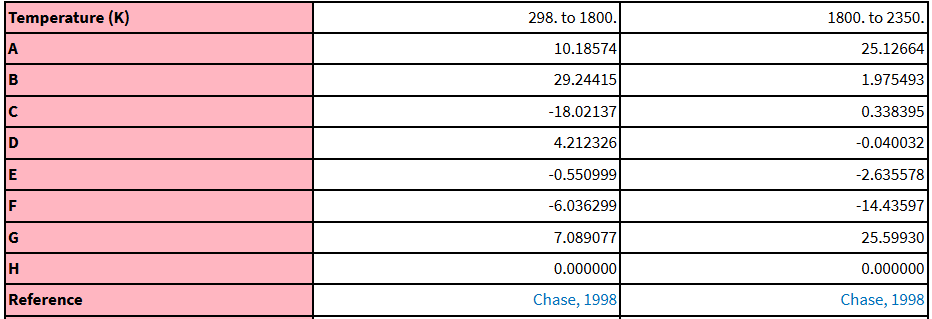

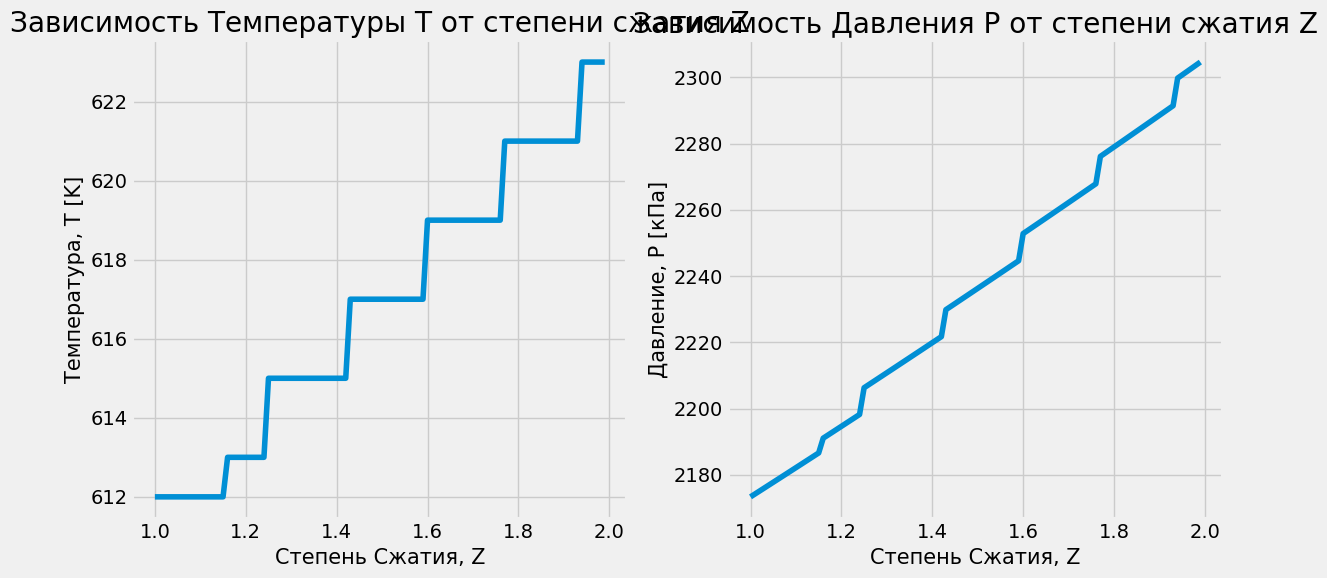

<ipython-input-6-bd4341165ff0>:79: RuntimeWarning: divide by zero encountered in scalar divide
  D = [np.sqrt((P2_values[i] - p1[i]) * (v1[i] / m[i]) / (1 - 1/z[i])) for i in range(len(P2_values))]


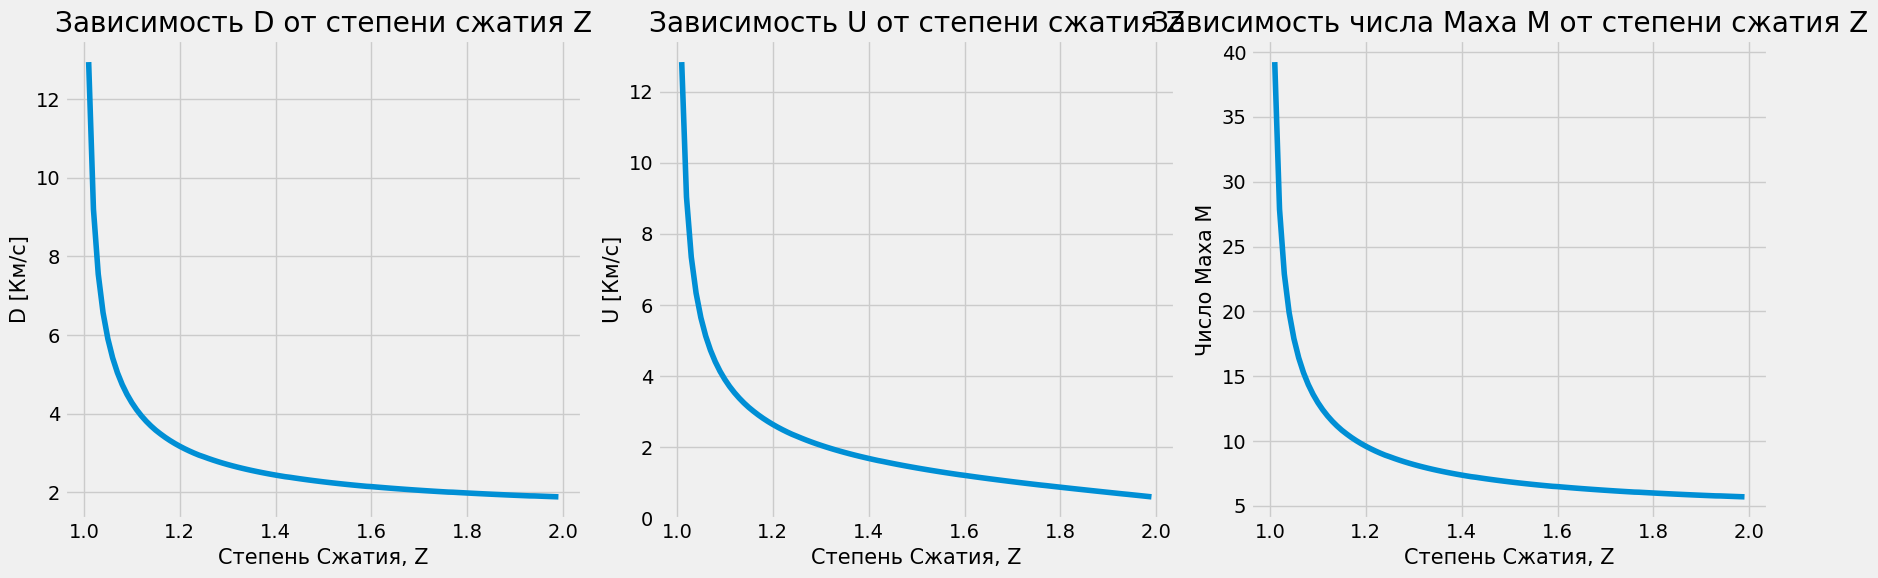

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Новые значения для z, V и V2
z = np.arange(1.0, 2.0, 0.01)
V = np.linspace(2.34, 2.808, 100)
V2 = np.linspace(2.34, 2.2464, 100)

def func(t, V2):
    return dH(t) * 1000 - PV(t, V2)

def dH(t):
    if 298 < t < 1800:
        a = 10.18574
        b = 29.24415
        c = -18.02137
        d = 4.212326
        e = -0.550999
        f = -6.036299
    elif 1800 <= t < 2350:
        a = 25.12664
        b = 1.975493
        c = 0.338395
        d = -0.040032
        e = -2.635578
        f = -14.43597
    t /= 1000
    return (a * t + b * t**2 / 2 + c * t**3 / 3 + d * t**4 / 4 - e / t + f)

def PV(t, V2, V1=2.808, P1=100):
    R = 8.31
    return 1/2 * (V1 + V2) * (R * t / V2 - P1)

def res(V2):  # Бинарный поиск
    left = 101
    right = 2350
    while left < right:
        mid = (left + right) // 2
        if func(mid, V2) > 0:
            right = mid
        elif func(mid, V2) < 0:
            left = mid + 1
    return mid

def P2(t, V2, V1=2.808):
    R = 8.31
    return (R * t / V2)

t = []
P2_values = []
v1 = [2.808] * len(V2)  # Используем длину V2 для v1
p1 = [100] * len(V2)   # Используем длину V2 для p1
m = [1.25 * 2.808 / 1000] * len(V2)  # Используем длину V2 для m

for i in range(len(V2)):
    temp_t = res(V2[i])
    t.append(temp_t)
    P2_values.append(P2(temp_t, V2[i]))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(z, t)
plt.grid(True)
plt.title("Зависимость Температуры T от степени сжатия Z")
plt.xlabel('Степень Сжатия, Z', fontsize=15)
plt.ylabel('Температура, T [K]', fontsize=15)

plt.subplot(1, 2, 2)
plt.plot(z, P2_values)
plt.grid(True)
plt.title("Зависимость Давления P от степени сжатия Z")
plt.xlabel('Степень Сжатия, Z', fontsize=15)
plt.ylabel('Давление, P [кПа]', fontsize=15)

plt.tight_layout()
plt.show()

c = 0.34
D = [np.sqrt((P2_values[i] - p1[i]) * (v1[i] / m[i]) / (1 - 1/z[i])) for i in range(len(P2_values))]
u = [np.sqrt((p1[i] - P2_values[i]) * (V2[i] / m[i]) + 1/z[i] * D[i]**2) for i in range(len(P2_values))]

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.plot(z, [D[i] / 1000 for i in range(len(D))])
plt.grid(True)
plt.title("Зависимость D от степени сжатия Z")
plt.xlabel('Степень Сжатия, Z', fontsize=15)
plt.ylabel('D [Км/c]', fontsize=15)

plt.subplot(1, 3, 2)
plt.plot(z, [u[i] / 1000 for i in range(len(u))])
plt.grid(True)
plt.title("Зависимость U от степени сжатия Z")
plt.xlabel('Степень Сжатия, Z', fontsize=15)
plt.ylabel('U [Км/c]', fontsize=15)

plt.subplot(1, 3, 3)
plt.plot(z, [D[i] / 330 for i in range(len(D))])
plt.grid(True)
plt.title("Зависимость числа Маха M от степени сжатия Z")
plt.xlabel('Степень Сжатия, Z', fontsize=15)
plt.ylabel('Число Маха M', fontsize=15)

plt.tight_layout()
plt.show()
